In [1]:
#this script compares rlogl distribution in different BDT score 
%pylab
%matplotlib inline
import pandas as pd
import sys
sys.path.append("../code")

%config InlineBackend.figure_format = 'png'

import shelve
import os
from scipy import signal


from kde import gaussian_kde

mpl.rcParams["savefig.dpi"] = 300
mpl.rcParams["figure.dpi"] = 150 # this is for displaying

cmap = plt.get_cmap('jet', 100)
cmap.set_under('white')

Using matplotlib backend: Qt4Agg
Populating the interactive namespace from numpy and matplotlib


In [3]:
passSR = pd.read_csv("../Resources/EHE/EHE_effective.csv")
print passSR.keys()

Index([u'Unnamed: 0', u'cos(ImpLF_zen)', u'PrimaryNeutrinoEnergy', u'wE3'], dtype='object')


/usr/local/lib/python2.7/dist-packages/matplotlib/collections.py:548: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == 'face':


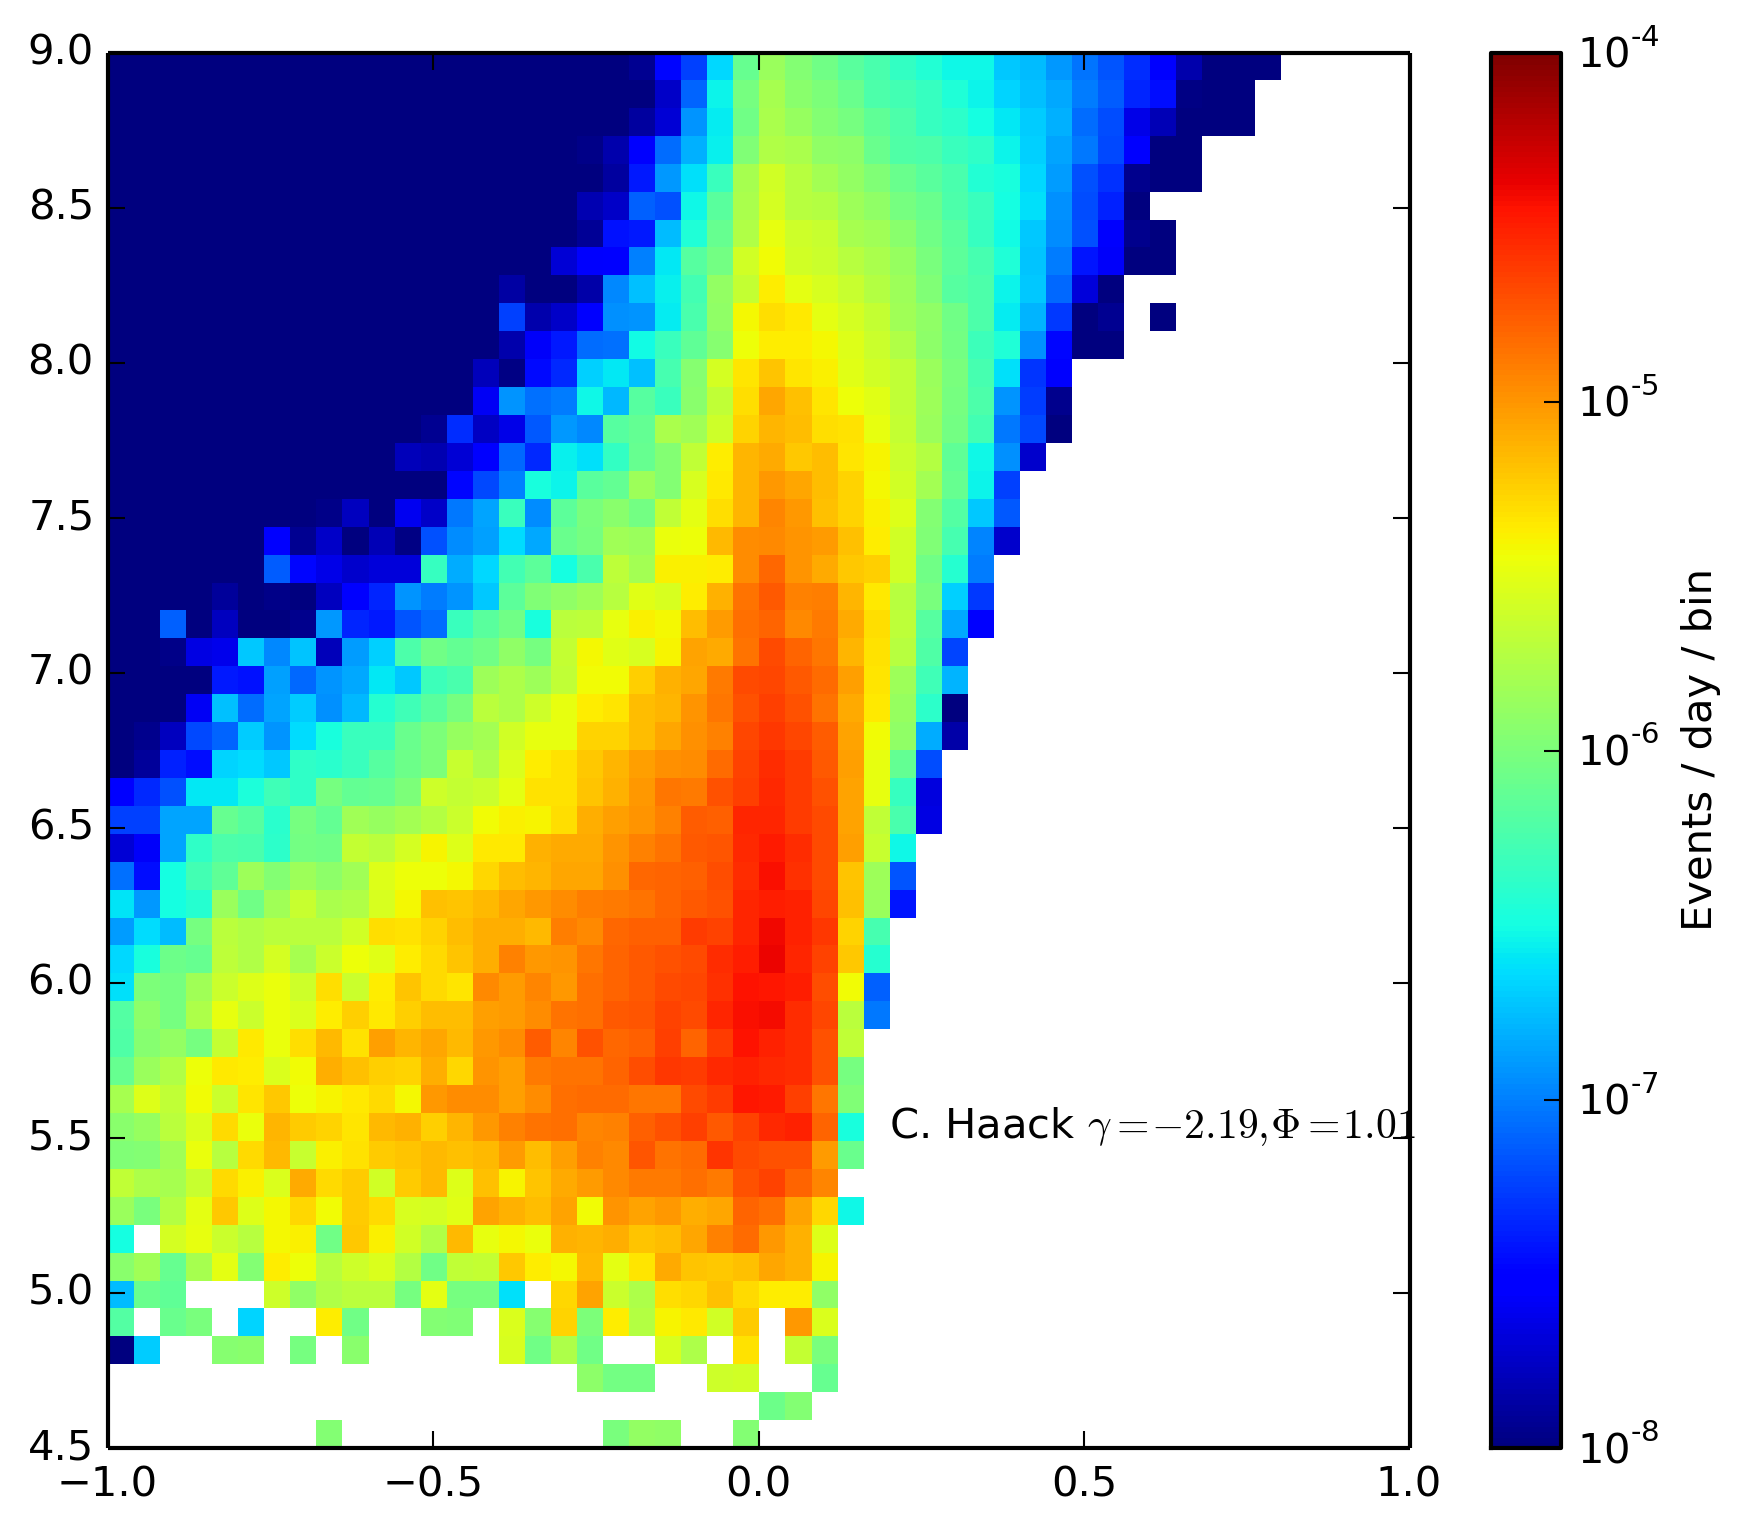

In [4]:
from matplotlib.colors import LogNorm
xval = 'cos(ImpLF_zen)'
yval = 'PrimaryNeutrinoEnergy'
# Plot constants
nbins = 50
xmin  = -1
xmax  = 1
ymin  = 4.5
ymax  = 9.
zmin  = 1e-8
zmax  = 1e-4

# Create a plot tool for 2D plots
 
# Method to draw previous cuts
def drawCuts(axis):
    axis.plot([-1,0.1], [3.6,3.6], c='black', lw=2,label='EHE Alert Selection')
    def f(x):
        return 3.6 + 2.99 * np.sqrt(np.fabs(1-np.power((x-0.93)/0.83,2)))
    step = 0.01
    x = np.arange(0.1,1,step)
    axis.plot(x,f(x),c='black',lw=2)
              
    
   
# Plot 2D for inner
fig, ax = plt.subplots(ncols=1,figsize=(7,6))

outputhistogram = plt.hist2d(passSR[xval].as_matrix(), np.log10(passSR[yval].as_matrix()), weights=passSR['wE3'].as_matrix()/(35.3898958333 + 34.54),
           bins = nbins,range = ([xmin,xmax],[ymin,ymax],[zmin,zmax]),norm=LogNorm(vmin=zmin, vmax=zmax), cmap='jet')
cb = plt.colorbar()
cb.set_label('Events / day / bin')
#drawCuts(ax)
#plt.plot([zen,zen],[3,9],ls="--",lw=2 ,c="cyan")
#plt.plot([-1,1],[NPE,NPE],ls="--",lw=2,c="cyan" )
#plt.text(-0.7,6.7,"Lars -2.49")
#plt.savefig(savedir+'nominal/E2_coszen_lognpe.png')
plt.text(0.2,5.5,"C. Haack $\gamma=-2.19, \Phi=1.01$")


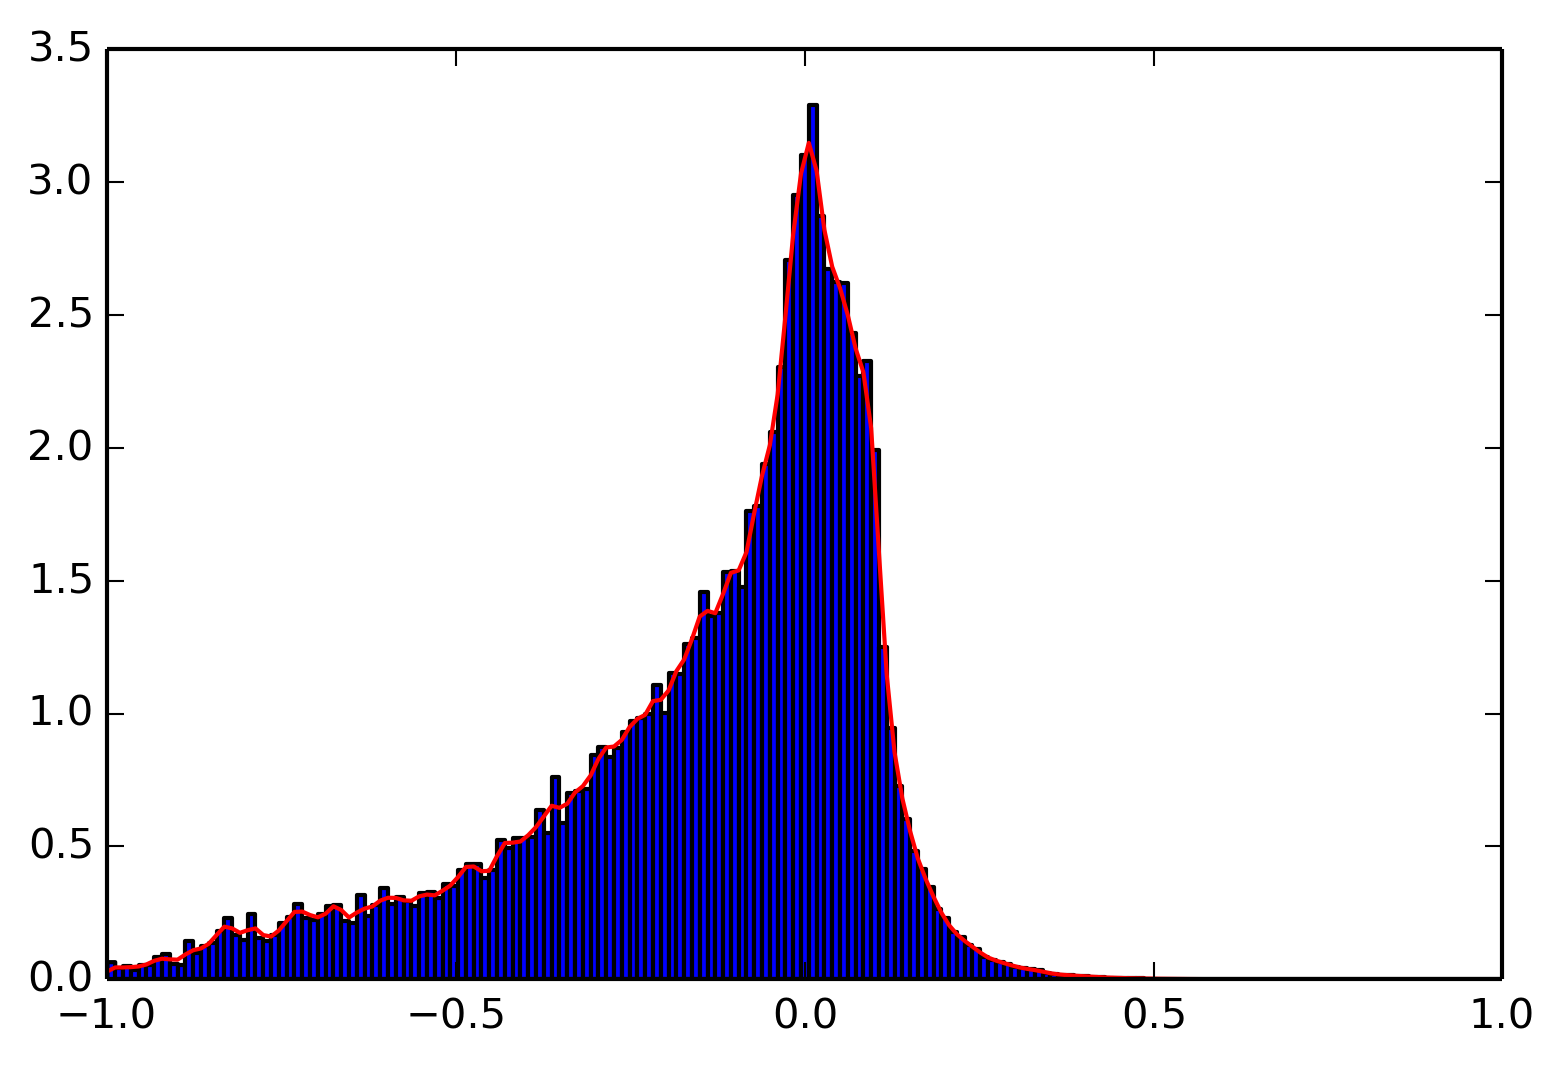

In [5]:

bins = np.linspace(-1,1,180)
m = plt.hist(passSR["cos(ImpLF_zen)"], weights=np.array(passSR["wE3"])/0.457845099495,bins=bins, normed=True)

density = gaussian_kde(np.array(passSR["cos(ImpLF_zen)"]), weights=np.array(passSR["wE3"]))
density.set_bandwidth(0.04)
xs = m[1]

plt.plot(xs, density(xs),color="red", label="kde(bright)")


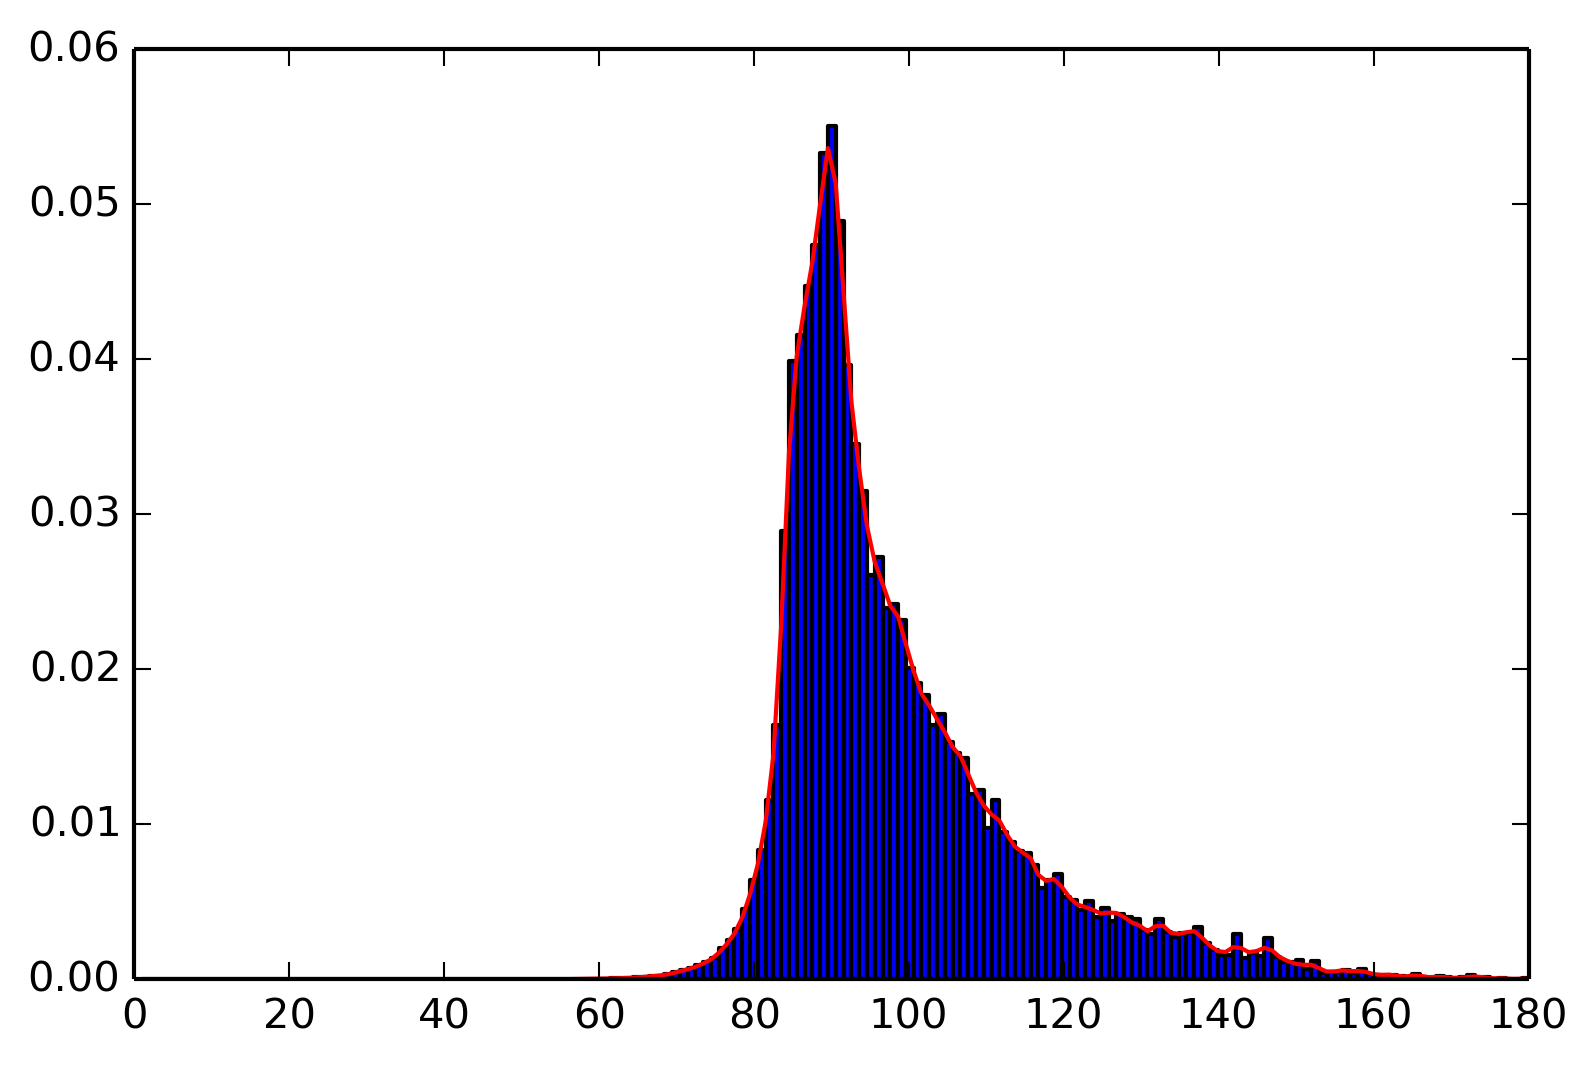

In [6]:
plt.figure()

bins = np.linspace(0,180,180)
m = plt.hist(np.rad2deg(np.arccos(passSR["cos(ImpLF_zen)"])), weights=np.array(passSR["wE3"])/0.457845099495,bins=bins, normed=True)

density = gaussian_kde(np.rad2deg(np.arccos(np.array(passSR["cos(ImpLF_zen)"]))), weights=np.array(passSR["wE3"]))
density.set_bandwidth(0.05)
xs = m[1]
plt.plot(xs, density(xs),color="red", label="kde(bright)")
